# Import lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

# Read and Preproce Data

In [ ]:
df = pd.read_excel('input/StudentsPerformance.xlsx')

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# Data analysis

In [ ]:
df.columns

In [ ]:
sns.countplot(x="Gender", data=df, palette="Set1")

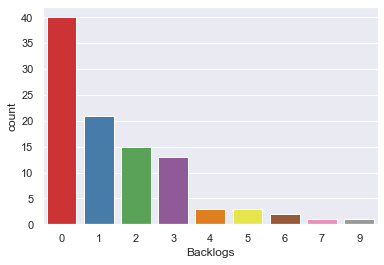

In [10]:
sns.countplot(x="Backlogs", data=df, palette="Set1")

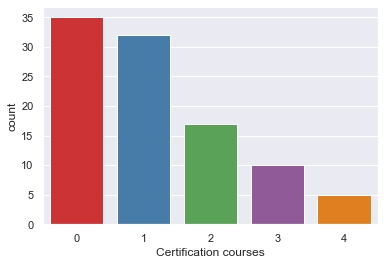

In [11]:
sns.countplot(x="Certification courses", data=df, palette="Set1")

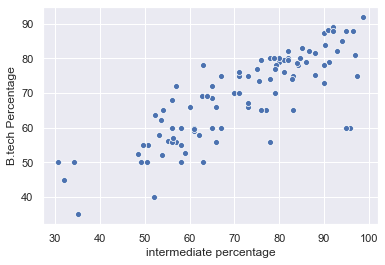

In [12]:
sns.scatterplot(x="intermediate percentage", y="B.tech Percentage", data=df)

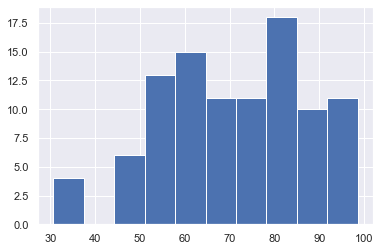

In [13]:
plt.hist(x="intermediate percentage",data=df)
plt.show()

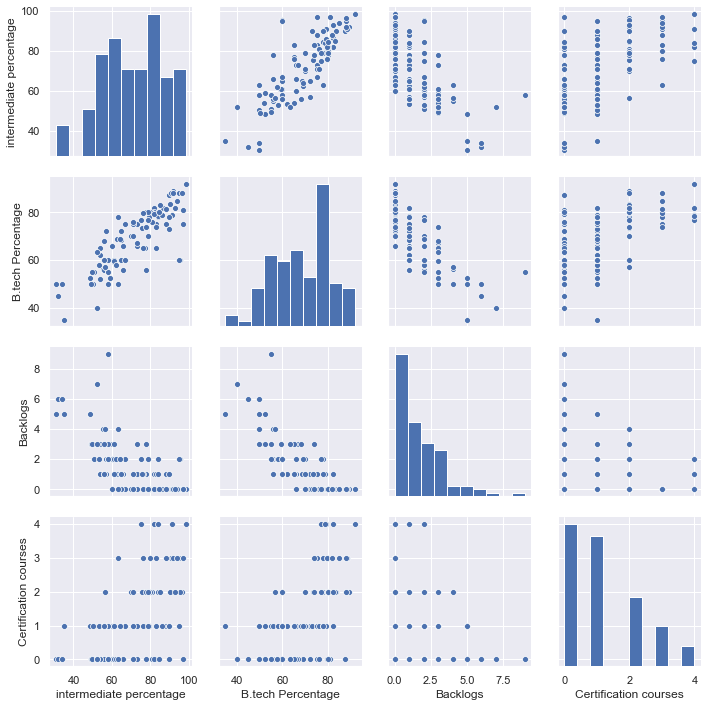

In [14]:
sns.pairplot(df)

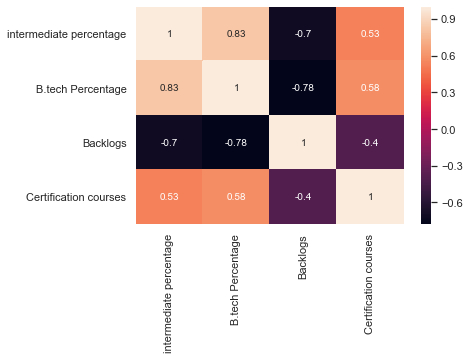

In [15]:
sns.heatmap(df.corr(),annot=True)

# Cluster

In [16]:
df.columns

Index(['Student Name', 'Gender', 'intermediate percentage',
       'B.tech Percentage', 'Backlogs', 'Certification courses'],
      dtype='object')

In [17]:
np.random.seed(123)

In [18]:
#subset
df1 = df[['intermediate percentage', 'B.tech Percentage','Backlogs', 'Certification courses']]

In [19]:
#For find the k value
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [20]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df1)
distances, indices = neighbors_fit.kneighbors(df1)

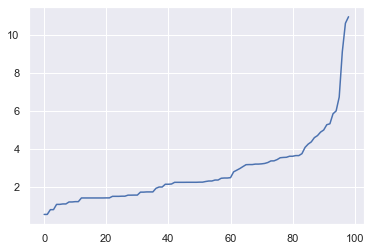

In [21]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [22]:
from sklearn.cluster import KMeans

In [23]:
df1.shape

(99, 4)

In [24]:
cluster_km = KMeans(n_clusters=5)

In [25]:
cluster_km.fit(df1)

KMeans(n_clusters=5)

In [26]:
l = cluster_km.labels_

In [27]:
clusters = np.unique(l)

In [28]:
clusters

array([0, 1, 2, 3, 4])

In [29]:
df1['km_opt_labels']=cluster_km.labels_
df1['km_opt_labels'].value_counts()

C:\Users\cvsra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1    29
0    28
2    22
4    16
3     4
Name: km_opt_labels, dtype: int64

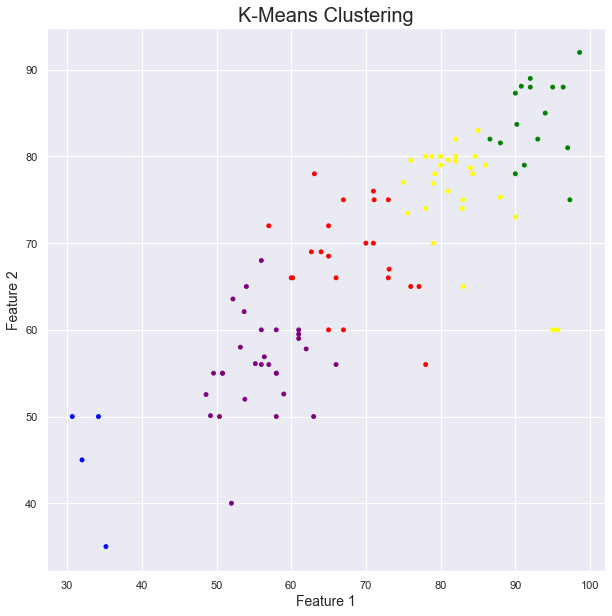

In [31]:
import matplotlib
colors=['yellow','purple','red','blue','green']
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df1['intermediate percentage'],df1['B.tech Percentage'],c=df1['km_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

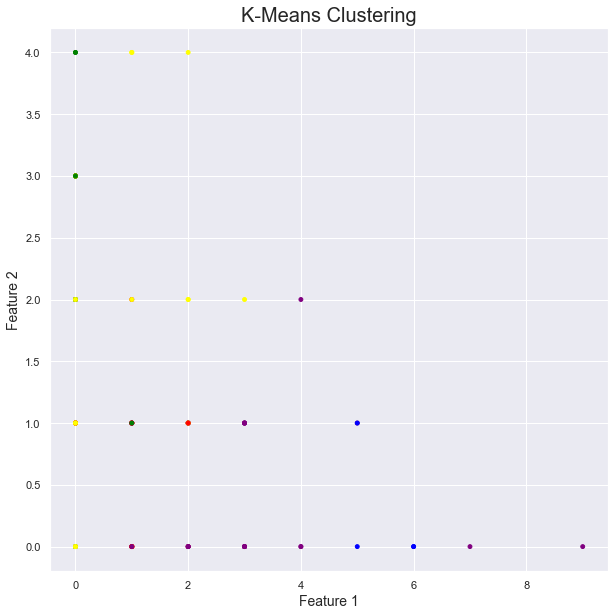

In [32]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df1['Backlogs'],df1['Certification courses'],c=df1['km_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [33]:
df1.head()

intermediate percentage  B.tech Percentage  Backlogs  \
0                     73.0               66.0         1   
1                     86.6               82.0         0   
2                     95.0               88.0         0   
3                     55.2               56.1         4   
4                     50.8               55.0         3   

   Certification courses  km_opt_labels  
0                      0              2  
1                      1              4  
2                      3              4  
3                      0              1  
4                      1              1

In [34]:
df1.groupby(['km_opt_labels']).mean()

intermediate percentage  B.tech Percentage  Backlogs  \
km_opt_labels                                                         
0                            82.432143          75.927500  0.642857   
1                            55.858621          56.075517  2.931034   
2                            67.968182          68.477273  0.863636   
3                            33.025000          45.000000  5.500000   
4                            92.631250          84.228750  0.062500   

               Certification courses  
km_opt_labels                         
0                           1.714286  
1                           0.448276  
2                           0.818182  
3                           0.250000  
4                           2.250000

In [35]:
#Based on above result you shold give label

In [36]:
df1['km_opt_labels'] = df1['km_opt_labels'].replace(to_replace =(4,0,2,1,3),value =('1st Class','2st Class','3st Class','4st Class','5st Class'))

C:\Users\cvsra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df1.head()

intermediate percentage  B.tech Percentage  Backlogs  \
0                     73.0               66.0         1   
1                     86.6               82.0         0   
2                     95.0               88.0         0   
3                     55.2               56.1         4   
4                     50.8               55.0         3   

   Certification courses km_opt_labels  
0                      0     3st Class  
1                      1     1st Class  
2                      3     1st Class  
3                      0     4st Class  
4                      1     4st Class

# Machine Learing

#### Cross Validation & HyperParameter Tuning

In [38]:
#Loading the dataset

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [39]:
X.head()

intermediate percentage  B.tech Percentage  Backlogs  Certification courses
0                     73.0               66.0         1                      0
1                     86.6               82.0         0                      1
2                     95.0               88.0         0                      3
3                     55.2               56.1         4                      0
4                     50.8               55.0         3                      1

In [40]:
y[0:10]

0    3st Class
1    1st Class
2    1st Class
3    4st Class
4    4st Class
5    5st Class
6    1st Class
7    1st Class
8    4st Class
9    3st Class
Name: km_opt_labels, dtype: object

In [41]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [42]:
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

In [43]:
# define the model
model = RandomForestClassifier(random_state=1)

In [44]:
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]

In [45]:
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

In [46]:
search.fit(X,y)

C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_

C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\cvsra\Anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [10, 100, 500]},
             scoring='accuracy')

In [47]:
search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [48]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

In [49]:
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

In [50]:
scores

array([1.        , 0.7       , 0.9       , 0.9       , 1.        ,
       0.8       , 0.7       , 0.9       , 0.7       , 0.66666667])

In [51]:
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.827 (0.123)


# Train test Split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# RF

In [54]:
rf_model = RandomForestClassifier(max_features=2, n_estimators=100)

In [55]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=2)

In [56]:
y_pred = rf_model.predict(X_test)

In [57]:
print("Classification Report \n",
      classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

   1st Class       0.67      1.00      0.80         4
   2st Class       1.00      0.67      0.80         9
   3st Class       0.88      0.78      0.82         9
   4st Class       0.85      1.00      0.92        11

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.84        33
weighted avg       0.87      0.85      0.85        33



Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


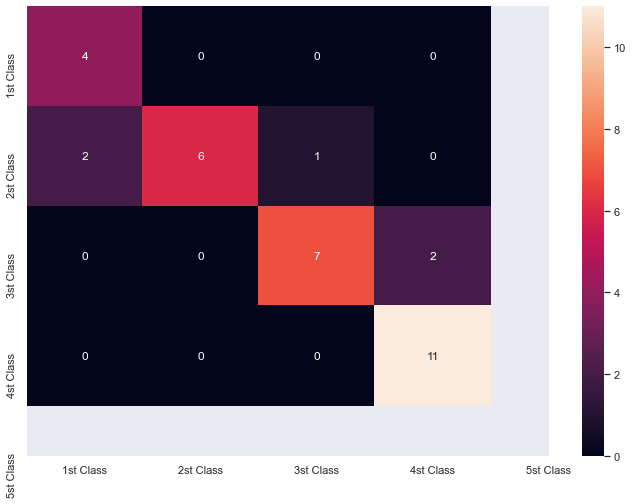

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print("Confusion Matrix \n",
      sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,yticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class'),xticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class')))

In [59]:
print("Accuracy on Test data :",accuracy_score(y_test,y_pred))

Accuracy on Test data : 0.8484848484848485


# SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC()

In [62]:
svm_model.fit(X_train,y_train)

SVC()

In [63]:
y_pred_svm = svm_model.predict(X_test)

In [64]:
print("Classification Report \n",
      classification_report(y_test,y_pred_svm))

Classification Report 
               precision    recall  f1-score   support

   1st Class       0.00      0.00      0.00         4
   2st Class       0.60      1.00      0.75         9
   3st Class       1.00      0.56      0.71         9
   4st Class       0.85      1.00      0.92        11

    accuracy                           0.76        33
   macro avg       0.61      0.64      0.60        33
weighted avg       0.72      0.76      0.70        33



C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


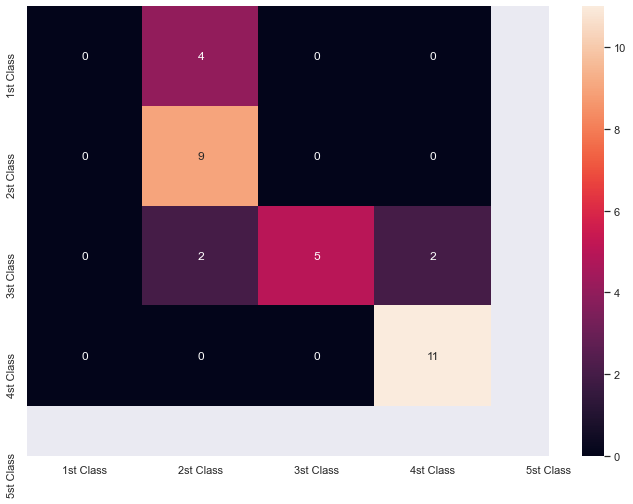

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print("Confusion Matrix \n",
      sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,yticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class'),xticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class')))

In [66]:
print("Accuracy on Test data :",accuracy_score(y_test,y_pred_svm))

Accuracy on Test data : 0.7575757575757576


# LR

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr_model = LogisticRegression()

In [69]:
lr_model.fit(X_train,y_train)

C:\Users\cvsra\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [70]:
y_pred_lr = lr_model.predict(X_test)

In [71]:
print("Classification Report \n",
      classification_report(y_test,y_pred_lr))

Classification Report 
               precision    recall  f1-score   support

   1st Class       0.60      0.75      0.67         4
   2st Class       0.70      0.78      0.74         9
   3st Class       0.75      0.33      0.46         9
   4st Class       0.71      0.91      0.80        11

    accuracy                           0.70        33
   macro avg       0.69      0.69      0.67        33
weighted avg       0.71      0.70      0.67        33



Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


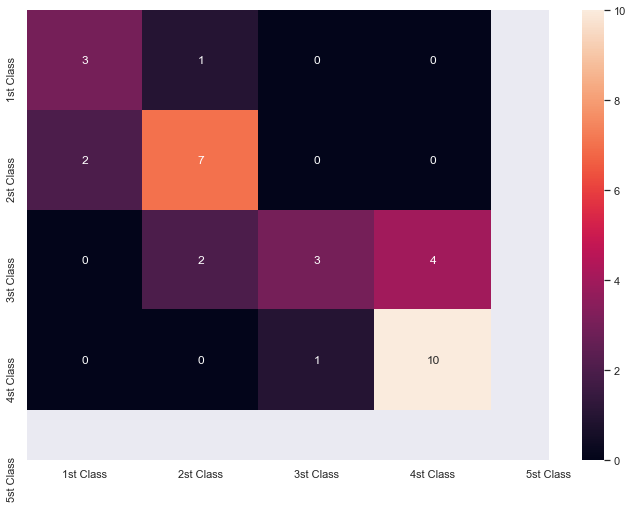

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print("Confusion Matrix \n",
      sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,yticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class'),xticklabels=('1st Class','2st Class','3st Class','4st Class','5st Class')))


In [73]:
print("Accuracy on Test data :",accuracy_score(y_test,y_pred_lr))

Accuracy on Test data : 0.696969696969697


# End...